In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
categoricals = data.select_dtypes(object)
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [5]:
#GET TIME VARIABLES BEFORE DROPING THE 'Effective To Date' COLUMN

categoricals['Effective To Date'] = categoricals['Effective To Date'].apply(lambda x : datetime.strptime(x, '%m/%d/%y'))
categoricals['month'] = categoricals['Effective To Date'].dt.month_name()

categoricals['weekday'] = categoricals['Effective To Date'].dt.day_name()
categoricals['weekday'].head()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_13920/466376188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['Effective To Date'] = categoricals['Effective To Date'].apply(lambda x : datetime.strptime(x, '%m/%d/%y'))
C:\Users\KIMERA\AppData\Local\Temp/ipykernel_13920/466376188.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['month'] = categoricals['Effective To Date'].dt.month_name()
C:\Users\KIMERA\AppData\Local\Temp/ipykernel_13920/466376188.py:6: SettingWithCopyWarning: 

0    Thursday
1      Monday
2    Saturday
3    Thursday
4    Thursday
Name: weekday, dtype: object

In [6]:
categoricals['day'] = categoricals['Effective To Date'].dt.day
categoricals['day'].head()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_13920/1535811212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['day'] = categoricals['Effective To Date'].dt.day


0    24
1    31
2    19
3    20
4     3
Name: day, dtype: int64

<AxesSubplot:>

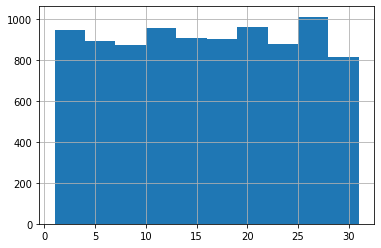

In [7]:
categoricals['day'].hist()

In [8]:
plot_data = pd.concat([categoricals['day'],categoricals['weekday'],categoricals['month']], axis = 1)
plot_data.head()

,day,weekday,month
0,24,Thursday,February
1,31,Monday,January
2,19,Saturday,February
3,20,Thursday,January
4,3,Thursday,February


In [9]:
# y = data['Total Claim Amount']
# y.head()

In [10]:
final_df = pd.concat([data['Total Claim Amount'], plot_data], axis = 1)
final_df.head()

,Total Claim Amount,day,weekday,month
0,384.811147,24,Thursday,February
1,1131.464935,31,Monday,January
2,566.472247,19,Saturday,February
3,529.881344,20,Thursday,January
4,138.130879,3,Thursday,February


In [11]:
# DROP THE FOLLOWING COLUMNS BECAUSE THEY HAVE HAVE LESS IMPACT ON OUR TARGET VARIABLE
categoricals = categoricals.drop(['Customer', 'Effective To Date','month','weekday','day'], axis =1)
categoricals.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


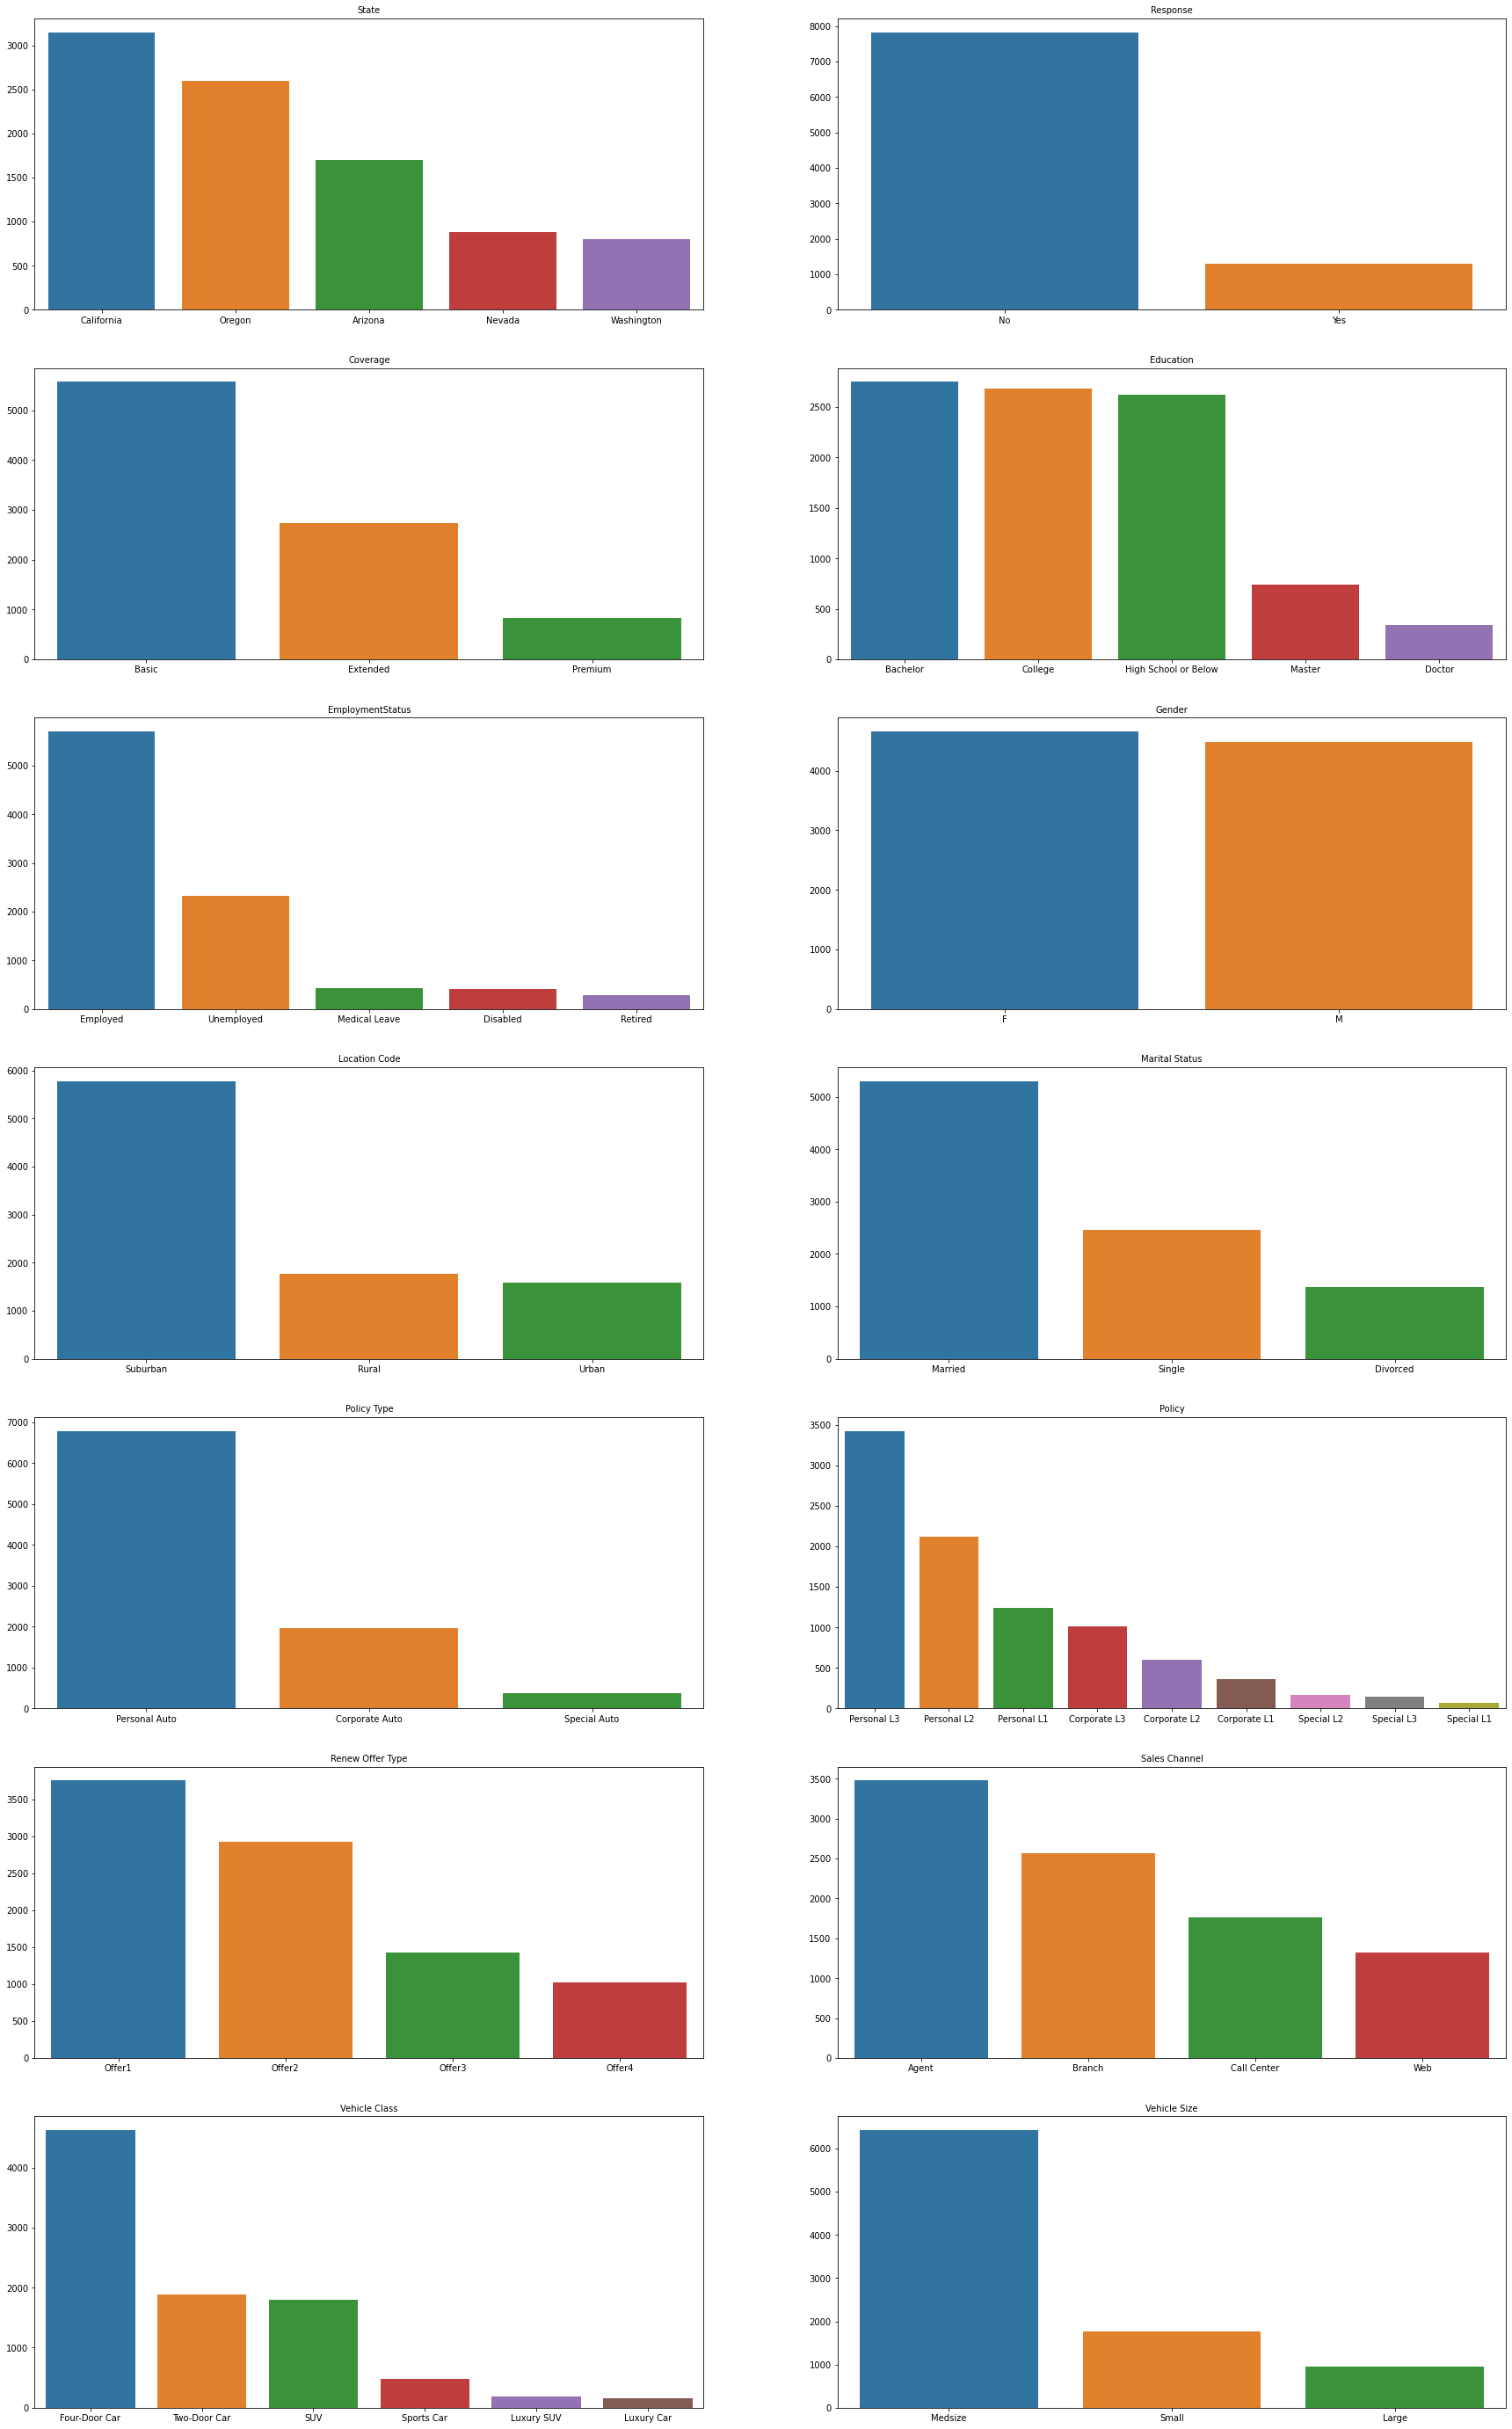

In [12]:
f, axes = plt.subplots(int(categoricals.shape[1]/2),2, figsize =(30,50))
for i, col in enumerate(categoricals):
    sns.barplot(x = categoricals[col].value_counts().index,
                y = categoricals[col].value_counts(),
                ax = axes[int(i/2)][int(i)%2])
    axes[int(i/2)][int(i)%2].set_title(col,fontsize = 10)
    axes[int(i/2)][int(i)%2].set_ylabel('')


In [13]:
# Some Columns are imbalanced. We can combine some of them and make the data more balanced

In [14]:
# COMBINE Medical Leave, Disabled,Retired  INTO OTHERS 

def replace_fxn(x):
    x = str(x)
    if x == 'Disabled' or x == 'Retired' or x == 'Medical Leave':
        return 'others'
    else:
        return x
categoricals['EmploymentStatus'] = categoricals['EmploymentStatus'].apply(lambda x: replace_fxn(x))
categoricals['EmploymentStatus'].value_counts()

Employed      5698
Unemployed    2317
others        1119
Name: EmploymentStatus, dtype: int64

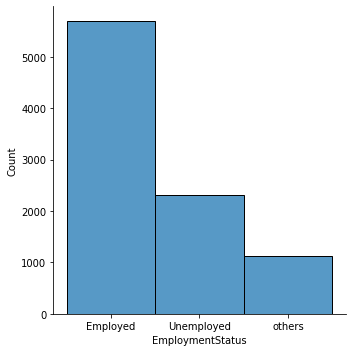

In [15]:
sns.displot(categoricals['EmploymentStatus'])
plt.show()

In [16]:
def replace_fxn(x):
    x = str(x)
    if x == 'Nevada' or x == 'Washington':
        return 'others'
    else:
        return x
categoricals['State'] = categoricals['State'].apply(lambda x: replace_fxn(x))
categoricals['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
others        1680
Name: State, dtype: int64

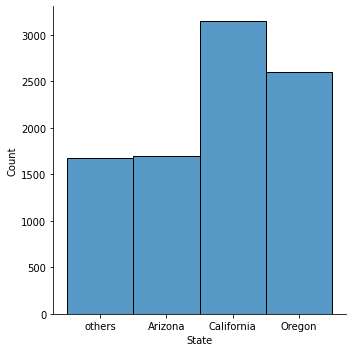

In [17]:
sns.displot(categoricals['State'])
plt.show()

In [18]:
# 4. Plot the time variable
final_df.columns

Index(['Total Claim Amount', 'day', 'weekday', 'month'], dtype='object')

<AxesSubplot:xlabel='weekday', ylabel='Total Claim Amount'>

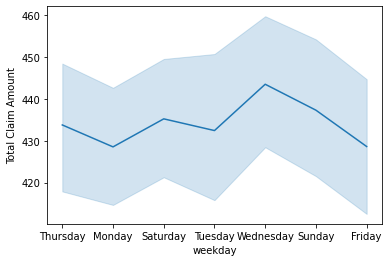

In [19]:
sns.lineplot(x=final_df['weekday'], y = final_df['Total Claim Amount'])

<AxesSubplot:xlabel='month', ylabel='Total Claim Amount'>

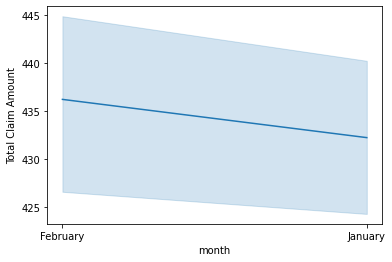

In [20]:
sns.lineplot(x=final_df['month'], y = final_df['Total Claim Amount'])

<AxesSubplot:xlabel='weekday', ylabel='Total Claim Amount'>

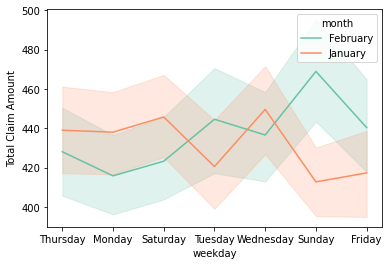

In [21]:
sns.lineplot(x=final_df['weekday'], y = final_df['Total Claim Amount'], hue = final_df['month'], palette = 'Set2')